In [1]:
from manim import *

Manim Community v0.16.0.post0

In [2]:
FINAL_EQN_VGROUP = None

In [277]:
EQN_SIZE = 70
EQN_SIZE_2 = 60

K_COLOR = BLUE
X_COLOR = GREEN_B
Z_COLOR = GREEN_B
N_COLOR = ORANGE
COLOR_DICT = {"k":K_COLOR, "x":X_COLOR, "n":N_COLOR, "Z":Z_COLOR}

TEXT_COLOR = GRAY_B
DELAY = 0.1
SKIP_MODE = False #mode to speed up animatins

def printEnumerate(thing):
    for a,b in enumerate(thing):
        print(a,b)

def MathTexAndColor(*tex):
        eqn = MathTex(*tex,  font_size = EQN_SIZE,tex_to_color_map=COLOR_DICT)
        return eqn


    
def set_new_location(A,B):
    A.set_x(B.get_x())
    A.set_y(B.get_y())
    
def color_and_move_this_eqn(eqn_name,eqn_target):
    eqn_name.set_color_by_tex("k", K_COLOR)
    eqn_name.set_color_by_tex("x", X_COLOR)
    eqn_name.next_to(eqn_target,DOWN*8)
    eqn_name.align_to(eqn_target,LEFT)

In [430]:
%%manim -ql -v CRITICAL gaussian_moments

#IMPORTANT: -ql = low quality. Remove flag before export!


class gaussian_moments(Scene):
    
    def skip_create(self,*args):
        if SKIP_MODE == False:
            self.play(Create(*args))
            self.wait(DELAY)
        else:
            self.add(*args)
    
    def construct(self):
        
        #setup the equation but in parts so we can manipualte it
        eqn_start = MathTex(r"\mathbb{E}[Z^{{k}}]",r"=", r"\frac{1}{\sqrt{2\pi}}", r" \intop_{-\infty}^{\infty}", font_size=EQN_SIZE)
        eqn_start.set_color_by_tex("k", K_COLOR)
        
        #print("eqn_start")
        #for i,x in enumerate(eqn_start):
        #    print(i,x)
        
        eqn_midA = MathTexAndColor(r" {{x}}^{{k}} \Bigr) ")
        eqn_midA[-1].color = BLACK #make the bracket black
        eqn_midB = MathTexAndColor(r" e^{-\frac{1}{2}{{x}}^2}} {{\Bigr)}}")
        eqn_midB[-1].color = BLACK #make the bracket black
        eqn_end = MathTexAndColor(r"d {{x}}")
        
        eqn = VGroup(eqn_start,eqn_midA,eqn_midB,eqn_end).arrange(RIGHT)
        eqn.shift(2.25*UP+0.5*LEFT)
        #eqn.to_corner(UL)
        
        #Now make a copy of the equation, but spaced so there is enough room to covert x^k into x^{k-1} x
        eqn_midA_final = MathTexAndColor(r" {{x}}^{ {{k}} - 1 } {{\Bigl(}} {{x}}  ")
        eqn_midA_final[5].color = BLACK #make the bracket black
        
        #arrange eqn using x^{k-1}x
        eqn_w_space = VGroup(eqn_start.copy(),eqn_midA_final,eqn_midB.copy(),eqn_end.copy()).arrange(RIGHT)
        eqn_w_space.align_to(eqn,UP)
        eqn_w_space.align_to(eqn,LEFT)
        eqn_w_space.shift(0.5*LEFT)
        #eqn_w_space.to_corner(UL)
        
        #replace x^{k-1}x by x^k (so everything else will be spaced correctly)
        eqn_midA_space = eqn_midA.copy() 
        set_new_location(eqn_midA_space,eqn_midA_final) 
        eqn_w_space[1] = eqn_midA_space
        
        #eqn2.set_color_by_tex("k", K_COLOR)
        #eqn2.set_color_by_tex("x", X_COLOR)
        
        #####
        #Animate the equation in slowly piece by piece so voice over explanation can be added
        #####
        
        self.play(FadeIn(eqn_start[0:4])) #fade in first part
        self.wait(DELAY)
        
        self.play(FadeIn(eqn_start[5],eqn_end)) #fade in integral sign
        self.wait(DELAY)
        
        pdf_text = Text("Probability Density Function")
        pdf_text.color=TEXT_COLOR
        pdf_text.next_to(eqn_start[5],DOWN)
        pdf_text.set_x(0)
        
        pdf = MathTexAndColor3(r"p_{{Z}}({{x}})=",r" e^{-\frac{1}{2", r"} {{x}}^2}",r"/ {\sqrt{2\pi", r"}}")
        #MathTex(r"p({{x}})={\scriptstyle\frac{1}{\sqrt{2\pi}}} e^{-\frac{1}{2}{{x}}^2}}", color=TEXT_COLOR, font_size=EQN_SIZE_2 )
        pdf.set_color_by_tex("x",X_COLOR)
        pdf.next_to(pdf_text,DOWN)
        
        pdf_graph = BELL_CURVE.copy() #FunctionGraph(lambda t: np.exp(-0.5*t**2),color=TEXT_COLOR)
        pdf_graph.next_to(pdf,DOWN)
        
        pdf_list = [pdf,pdf_graph]
        self.play(Create(pdf_text), *[FadeIn(mob) for mob in pdf_list]) #fade in PDF
        self.wait(DELAY)
        self.play(FadeIn(eqn_start[4],eqn_midB)) #fade in 1/sqrt(2pi) and e^-x^2/2
        self.wait(DELAY)
        pdf_list = [pdf,pdf_text,pdf_graph]
        self.play(*[FadeOut(mob) for mob in pdf_list]) #fade out PDF
        self.wait(DELAY)

        box = SurroundingRectangle(eqn_start[1]) #box to surround z^k
        self.play(FadeIn(eqn_midA),Create(box))
        self.wait(DELAY)
        self.play(FadeOut(box))
        self.wait(DELAY)
        
        #if SKIP_MODE == False: 
        #    for parts in [ [eqn_start[0:4]],[eqn_start[5],eqn_end],[eqn_start[4],eqn_midB],[eqn_midA]]:
        #        self.play(FadeIn(*parts))
        #        self.wait(DELAY)
        #else:
        #    self.add(eqn)
            
        if SKIP_MODE == False:
            int_by_parts_q = Text("Integration by parts?")
            int_by_parts_q.color = TEXT_COLOR
            int_by_parts_q.next_to(eqn_midA,UP)
            int_by_parts_q.align_to(eqn_midA,LEFT)
            self.play(Create(int_by_parts_q))
            self.wait(DELAY)
            self.play(FadeOut(int_by_parts_q))
            self.wait(DELAY)
            
            
            
        self.play(ReplacementTransform(eqn,eqn_w_space))
        self.play(TransformMatchingTex(eqn_midA_space,eqn_midA_final))
        self.wait(DELAY)
        self.play(FadeToColor(eqn_midB[-1], color=WHITE),FadeToColor(eqn_midA_final[5], color=WHITE))
        self.wait(DELAY)
        
        back_brace = BraceLabel(VGroup(eqn_midA_final[-4:-1],eqn_midB),r"\text{Do }\int")
        back_brace.color = TEXT_COLOR
        self.skip_create(back_brace)
        
        front_brace = BraceLabel(eqn_midA_final[0:5],r"\text{Do }\frac{d}{dx}")
        front_brace.align_to(back_brace,UP)
        front_brace.color = TEXT_COLOR
        self.skip_create(front_brace)
        
        int_by_parts = Text("Integration by parts!")
        int_by_parts.color = TEXT_COLOR
        int_by_parts.next_to(eqn_midA_final,UP)
        int_by_parts.align_to(eqn_midA_final,LEFT)
        self.skip_create(int_by_parts)
        
        
        eqn_ibp = MathTex(r"=", r"\frac{-1}{\sqrt{2\pi}}", r" \intop_{-\infty}^{\infty}", r"({{k}}-1){{x}}^{{{k}}-2}",r"\bigl(-e^{-\frac{1}{2}{{x}}^2}}\bigr)",r"d{{x}}", font_size=EQN_SIZE)
        
        
        eqn_ibp_no_minus = MathTex(r"=", r"\frac{1}{\sqrt{2\pi}}", r"\intop_{-\infty}^{\infty}", r"({{k}}-1){{x}}^{{{k}}-2}",r"\bigl(e^{-\frac{1}{2}{{x}}^2}}\bigr)",r"d{{x}}", font_size=EQN_SIZE)
        
        
        eqn_ibp_k = MathTex(r"=", r"({{k}}-1)", r"\frac{1}{\sqrt{2\pi}}", r"\intop_{-\infty}^{\infty}", r"{{x}}^{{{k}}-2}",r"\bigl(e^{-\frac{1}{2}{{x}}^2}}\bigr)",r"d{{x}}", font_size=EQN_SIZE)
        
        #line up to the equals sign from the first eqn
        color_and_move_this_eqn(eqn_ibp,eqn_start[3])
        color_and_move_this_eqn(eqn_ibp_no_minus,eqn_start[3])
        color_and_move_this_eqn(eqn_ibp_k,eqn_start[3])
        
        
        
        
        #print("eqn_midA_final")
        #for e,i in enumerate(eqn_midA_final):
        #    print(e,i)
            
        #print("eqn_midB")
        #for e,i in enumerate(eqn_midB):
        #    print(e,i)
            
        #print("eqn_ibp_k")
        #for e,i in enumerate(eqn_ibp_k):
        #    print(e,i)
        #    
        #print("eqn_ibp_no_minus")
        #for e,i in enumerate(eqn_ibp_no_minus):
        #    print(e,i)
            
        
        #move over integral and 1/sqrt{2pi}
        pairs_list = [ [eqn_start[3],eqn_ibp[0]],[eqn_start[4],eqn_ibp[1]],[eqn_start[5],eqn_ibp[2]],[eqn_end,eqn_ibp[-2:]] ] 
        self.play(*[TransformFromCopy(a,b) for a,b in pairs_list])
        
        #do the derivative
        pairs_list = [ [eqn_midA_final[0:-4], eqn_ibp[3:10]] ]
        self.play(*[TransformFromCopy(a,b) for a,b in pairs_list], Indicate(front_brace))
        self.play(FadeOut(front_brace))
        self.wait(DELAY)
       
        
        #do the integral
        pairs_list = [ [eqn_midA_final[5:], eqn_ibp[10]],[eqn_midB, eqn_ibp[11:13]] ]
        self.play(*[TransformFromCopy(a,b) for a,b in pairs_list], Indicate(back_brace))
        self.play(FadeOut(back_brace),FadeOut(int_by_parts))
        self.wait(DELAY)
       
        
       
        
        #eqn_ibp_2MathTex(r"=", r"\frac{1}{\sqrt{2\pi}}", r" \intop_{-\infty}^{\infty}", r"({{k}}-1){{x}}^{{{k}}-2}",r"\bigl( e^{-\frac{1}{2}{{x}}^2}} \bigr)",r"d {{x}}", font_size=EQN_SIZE)
        
        
        self.play(ReplacementTransform(eqn_ibp,eqn_ibp_no_minus))
        self.wait(DELAY)
        
        self.play(TransformMatchingTex(eqn_ibp_no_minus,eqn_ibp_k))
        self.wait(DELAY)
        
        box = SurroundingRectangle(eqn_ibp_k[4:])
        self.skip_create(box)
        
        moment = MathTexAndColor(r"\mathbb{E}[Z^{ {{k}}-2} ]")
        moment.next_to(eqn_ibp_k[3],RIGHT)
        moment.align_to(eqn_ibp_k[3],DOWN)
        
        
        
        self.play(ReplacementTransform(eqn_ibp_k[4:],moment),FadeOut(box))
        self.wait(DELAY)
        
        
        LHS = VGroup(eqn_w_space[0][0:4])
        LHS.generate_target()
        LHS.target.shift(1.65*RIGHT+0.3*UP) #this shift was optimized for the NEXT scene to fit
        
        
        
        RHS = VGroup(eqn_ibp_k[1],eqn_ibp_k[2],eqn_ibp_k[3],moment)
        RHS.generate_target()
        RHS.target.next_to(LHS.target,RIGHT)
        
        #eqn_w_space[1] ,eqn_start[0]
        fade_list = [eqn_ibp_k[0],eqn[2],eqn_w_space[0][4:],eqn_midA_final, eqn_w_space[2],eqn_w_space[3], eqn_end]    
        self.play(MoveToTarget(LHS),MoveToTarget(RHS), *[FadeOut(mob) for mob in fade_list] )
        self.wait(DELAY)
        
        global THE_FINAL_EQN_VGROUP
        THE_FINAL_EQN_VGROUP = VGroup(LHS,RHS) #save the final equation to be used in the next scene
        
        
        #printEnumerate(FINAL_EQN_VGROUP)
        
        
        self.wait(2)

In [417]:
%%manim -ql -v CRITICAL double_factorials

#Note that TOP_LEFT_X and TOP_LEFT_Y are imported from the previous scene


EQN_SIZE_3 = 60
def MathTexAndColor3(*tex):
        eqn = MathTex(*tex,  font_size = EQN_SIZE_3) #,tex_to_color_map=COLOR_DICT)
        eqn.set_color_by_tex("k", K_COLOR)
        eqn.set_color_by_tex("x", X_COLOR)
        eqn.set_color_by_tex("Z", Z_COLOR)
        return eqn

class double_factorials(Scene):
    
    def skip_create(self,*args):
        if SKIP_MODE == False:
            self.play(Create(*args))
            self.wait(DELAY)
        else:
            self.add(*args)
    
    def construct(self):
        FINAL_EQN_VGROUP = THE_FINAL_EQN_VGROUP.copy()
        #######This shift was already animated in previous scene: FINAL_EQN_VGROUP.shift(1.65*RIGHT+0.3*UP)
        self.add(FINAL_EQN_VGROUP) #the final equation from the previous scene
        self.wait(DELAY)
        
        #self.play(MoveToTarget(FINAL_EQN_VGROUP))
        
        
        #return 0
        
        
        
        #for e in FINAL_EQN_VGROUP:
        #    print("---")
        #    printEnumerate(e)
        
        #k_Es = the list of Tex expression E[Z^k]
        M=[1,0,1,0,3,0,15,0,105]
        k_Es = [MathTexAndColor3(r"\mathbb{E}",r"[",r"Z^",str(k),"]") for k in range(9)]
        k_Es_ans = [MathTexAndColor3(str(M[k])) for k in range(9)]
        #r"\mathbb{E}",r"[",r"Z^",str(k),"]","=",
    
        #color the "k"s correctly (note that the ks are 0,1,2,3...)
        for mob in k_Es:
            printEnumerate(mob)
            mob[3].color = K_COLOR
        
        
        #add them to a group, arrange and set to side of screen
        k_Es_group = VGroup(*k_Es).arrange(RIGHT, buff = MED_LARGE_BUFF)
        k_Es_group.to_edge(LEFT)
        k_Es_group.shift(0.95*DOWN)
        
        for i in range(9):
            set_new_location(k_Es_ans[i],k_Es[i])
        
        #make boxes around the k's
        s_box = SurroundingRectangle(k_Es[0],buff=0.15)
        k_boxs = [Rectangle(width=s_box.width,height=0.618*s_box.width,color=GRAY_D) for i in range(9)]
        for i in range(9):
            set_new_location(k_boxs[i],k_Es[i])
            k_boxs[i].set_fill(GRAY_D,opacity=1) #box color is GRAY_D
        
        
        box_group = VGroup(*k_boxs)        
        #self.add(box_group)
        #self.add(k_Es_group) 
        
        #Arrows and labels
        ARROW_COLOR = GRAY_A
        
        
        #return 0
    
        even_arrows = [CurvedArrow(start_point=k_boxs[i].get_top(),end_point=k_boxs[i+2].get_top(),color=ARROW_COLOR,angle=-1.5707963267948966) for i in [0,2,4,6]]
        even_labels = [MathTex(r"\times",str(2*i+1),font_size=EQN_SIZE_3,color=ARROW_COLOR).next_to(even_arrows[i],UP) for i in range(3)]
        
        #same labels but with k-1 labeled and colored in correctly
        even_labels_colr = [MathTex(r"\times","(",str(2*i+2),"-1)",font_size=EQN_SIZE_3,color=ARROW_COLOR).next_to(even_arrows[i],UP) for i in range(3)]
        for mob in even_labels_colr:
            mob[2].color = K_COLOR #color in the k
        
        
        #printEnumerate(even_labels_colr[0])
        
        #self.add(*even_arrows)
        #self.add(*even_labels)
        
        odd_arrows = [CurvedArrow(start_point=k_boxs[i].get_bottom(),end_point=k_boxs[i+2].get_bottom(),color=ARROW_COLOR) for i in [1,3,5]]
        odd_labels = [MathTex(r"\times",str(2*i+2),font_size=EQN_SIZE_3,color=ARROW_COLOR).next_to(odd_arrows[i],DOWN) for i in range(3)]
        
        #self.add(*odd_arrows)
        #self.add(*odd_labels)
        
        #Add everything that was just created
        #self.add(box_group,k_Es_group,*even_arrows,*even_labels,*odd_arrows,*odd_labels)
        
        #Now animate the things out one at a time
        
        #Animate in E[Z^2]
        self.play(FadeIn(k_boxs[2]),Create(k_Es[2]))
        self.wait(DELAY)
        
        #Animate in E[Z^0]
        self.play(FadeIn(k_boxs[0],k_Es[0],even_arrows[0]))
        self.wait(DELAY)

        #Animate in E[Z^0] -> E[Z^2]
        self.play(FadeIn(even_labels_colr[0]))
        self.wait(DELAY)
        self.play(ReplacementTransform(even_labels_colr[0], even_labels[0])) #MatchingTex
        self.wait(DELAY)
        
        
        
        #Evaluate E[Z^0] = 1
        Z0_temp = MathTexAndColor3(r"\mathbb{E}",r"[",r"1","]")
        Z0_temp.align_to(k_Es[0],LEFT)
        Z0_temp.align_to(k_Es[0],DOWN)
        self.play(TransformMatchingTex(k_Es[0],Z0_temp))
        self.wait(DELAY)
        
        #printEnumerate(Z0_temp)
        
        #Z0_final is just the digit "1" that is leftover
        Z0_final = Z0_temp[2].copy()
        self.play(FadeOut(*[Z0_temp[k] for k in [0,1,3]]))#fade out all but the "1"
        
        #Bounce the 1 over the x1 to get E[Z^2]
        self.play(ReplacementTransform(Z0_final.copy(), k_Es_ans[2],path_arc=-1.57),FadeOut(k_Es[2]),Indicate(even_labels[0]))
        self.wait(DELAY)
        
        #Animate in E[Z^4]
        self.play(FadeIn(k_boxs[4]),Create(k_Es[4]))
        self.wait(DELAY)
        
        #Animate in the x(4-1) arrow
        self.play(FadeIn(even_arrows[1]))
        self.wait(DELAY)
        self.play(FadeIn(even_labels_colr[1]))
        self.wait(DELAY)
        
        #Animate x(4-1) -> x3
        self.play(ReplacementTransform(even_labels_colr[1], even_labels[1]))
        self.wait(DELAY)
        
        #Bounce 1 over to x1, x3 to evaluate E[Z^4]
        self.play(ReplacementTransform(Z0_final.copy(), k_Es_ans[2],path_arc=-1.57),Indicate(even_labels[0]))
        self.play(ReplacementTransform(k_Es_ans[2].copy(), k_Es_ans[4],path_arc=-1.57),FadeOut(k_Es[4]),Indicate(even_labels[1]))
        
        #Z^6:
        
        #Animate in E[Z^6]
        self.play(FadeIn(k_boxs[6]),Create(k_Es[6]))
        self.wait(DELAY)
        
        #Animate in the x(6-1) arrow
        self.play(FadeIn(even_arrows[2]))
        self.wait(DELAY)
        self.play(FadeIn(even_labels_colr[2]))
        self.wait(DELAY)
        
        #Animate x(6-1) -> x5
        self.play(ReplacementTransform(even_labels_colr[2], even_labels[2]))
        self.wait(DELAY)
        
        #Bounce 1 over to x1, x3, x5 to evaluate E[Z^6]
        self.play(ReplacementTransform(Z0_final.copy(), k_Es_ans[2],path_arc=-1.57),Indicate(even_labels[0]))
        self.play(ReplacementTransform(k_Es_ans[2].copy(), k_Es_ans[4],path_arc=-1.57),Indicate(even_labels[1]))
        self.play(ReplacementTransform(k_Es_ans[4].copy(), k_Es_ans[6],path_arc=-1.57),FadeOut(k_Es[6]),Indicate(even_labels[2]))
        
        
        #return 2
        
        ####Eqn with cases
        cases = MathTexAndColor3(r"\begin{cases} \phantom{(1-1)!!} \\ \phantom{(1-1)!!} \end{cases}")
        cases.next_to(FINAL_EQN_VGROUP[0])
        answer_even = MathTex(r"({{k}}-1)!! \: \text{ if }{{k}}\text{ is even}",font_size=EQN_SIZE_3)
        answer_even.set_color_by_tex("k", K_COLOR)        
        #printEnumerate(answer_even)
        answer_odd_0 = MathTex(r"0",font_size=EQN_SIZE_3)
        answer_odd_if = MathTex(r" \text{ if }{{k}}\text{ is }\,\text{odd}",font_size=EQN_SIZE_3)
        answer_odd_if.set_color_by_tex("k",K_COLOR)
        #printEnumerate(answer_odd_if)
        answer_even.next_to(cases,RIGHT)
        answer_even.align_to(cases,UP)
        answer_odd_0.next_to(cases,RIGHT)
        answer_odd_0.align_to(cases,DOWN)
        answer_odd_if.align_to(answer_even,RIGHT)
        answer_odd_if.align_to(cases,DOWN)
        
        
        
        answer_even_big = MathTex(r"({{k}}-1)!! \: \text{ if }{{k}}\text{ is even}",font_size=EQN_SIZE)
        answer_even_big.set_color_by_tex("k", K_COLOR)
        
        #self.play(FadeIn(answer_even),FadeIn(answer_odd_0),FadeIn(answer_odd_if))
        #printEnumerate(cases)
        
        #Replace LHS with the answer
        answer_even_big.next_to(FINAL_EQN_VGROUP[0],RIGHT)
        answer_even_big.align_to(FINAL_EQN_VGROUP[0],DOWN)
        self.play(FadeOut(FINAL_EQN_VGROUP[1]))        
        self.play(Create(answer_even_big))
        
        #odd moments
        #Animate in E[Z^1],E[Z^3],E[Z^5]
        self.play(*[FadeIn(k_boxs[k]) for k in [1,3,5]],*[Create(k_Es[k]) for k in [1,3,5]])
        self.wait(DELAY)
        
        #Animate in the odd arrows
        self.play(*[FadeIn(odd_arrows[k]) for k in [0,1]],*[FadeIn(odd_labels[k]) for k in [0,1]])
        self.wait(DELAY)
        
        #E[Z^1] = 0
        self.play(Transform(k_Es[1],k_Es_ans[1]))
        self.wait(DELAY)
        
        #bounce the 0 along
        self.play(ReplacementTransform(k_Es_ans[1].copy(), k_Es_ans[3],path_arc=1.57),Indicate(odd_labels[0]),FadeOut(k_Es[3]))
        self.play(ReplacementTransform(k_Es_ans[3].copy(), k_Es_ans[5],path_arc=1.57),Indicate(odd_labels[1]),FadeOut(k_Es[5]))
        self.wait(DELAY)
        
        #fade in the cases and final answer
        self.play(FadeIn(cases),Transform(answer_even_big,answer_even),Create(answer_odd_0),Create(answer_odd_if))
        self.wait(DELAY)
        
        
        
        
        self.wait(2)
        
        

0 SingleStringMathTex('\\mathbb{E}')
1 SingleStringMathTex('[')
2 SingleStringMathTex('Z^')
3 SingleStringMathTex('0')
4 SingleStringMathTex(']')
0 SingleStringMathTex('\\mathbb{E}')
1 SingleStringMathTex('[')
2 SingleStringMathTex('Z^')
3 SingleStringMathTex('1')
4 SingleStringMathTex(']')
0 SingleStringMathTex('\\mathbb{E}')
1 SingleStringMathTex('[')
2 SingleStringMathTex('Z^')
3 SingleStringMathTex('2')
4 SingleStringMathTex(']')
0 SingleStringMathTex('\\mathbb{E}')
1 SingleStringMathTex('[')
2 SingleStringMathTex('Z^')
3 SingleStringMathTex('3')
4 SingleStringMathTex(']')
0 SingleStringMathTex('\\mathbb{E}')
1 SingleStringMathTex('[')
2 SingleStringMathTex('Z^')
3 SingleStringMathTex('4')
4 SingleStringMathTex(']')
0 SingleStringMathTex('\\mathbb{E}')
1 SingleStringMathTex('[')
2 SingleStringMathTex('Z^')
3 SingleStringMathTex('5')
4 SingleStringMathTex(']')
0 SingleStringMathTex('\\mathbb{E}')
1 SingleStringMathTex('[')
2 SingleStringMathTex('Z^')
3 SingleStringMathTex('6')
4 Sin

In [6]:
def make_dice_face(i):
    dot = lambda: Dot().scale(1.5)
    dots = {
        1: dot(),
        2: VGroup(*[dot().shift(DL/3), dot().shift(UR/3)]),
        3: VGroup(*[dot().shift(UL/3), dot(), dot().shift(DR/3)]),
        4: VGroup(*[dot().shift((i*UP+j*LEFT)/3) for i in (-1, 1) for j in (-1, 1)]),
        5: VGroup(*[dot().shift((i*UP+j*LEFT)/3) for i in (-1, 1) for j in (-1, 1)], dot()),
        6: VGroup(*[dot().shift( (i-1) * DOWN/3 + (j-.5) * RIGHT/2) for i in range(3) for j in range(2)])
    }
    sq = Square(1.2, fill_opacity=.8, fill_color=BLACK).round_corners(.25).move_to(dots[i])
    face = VGroup(sq, dots[i])
    face.die_value = i
    return face

HIST_WIDTH = 6
HIST_HEIGHT = 1.85
HIST_COLOR = BLUE

def make_histogram(min_x,max_x,P,x_font_size=24):
    rng = max_x - min_x + 1
    chart = BarChart(
            values=P,
            bar_names=np.arange(min_x,max_x+1,1),
            y_range=[0,1.25*np.max(P),0.25*np.max(P)],
            bar_colors = [HIST_COLOR for _ in range(rng)],
            x_length=HIST_WIDTH,
            y_length=HIST_HEIGHT,
            x_axis_config={"font_size": x_font_size},
            y_axis_config={"font_size": 1, "line_to_number_buff":0}
        )
    return chart

from sympy import *
def sum_of_dice_hist(n):
    font_sizes = [None,60,40,30,20,12]
    if n==0:
        return None
    else:
        #n is number of dice to sum up
        x = symbols("x")
        f = (1/6*(1+x+x**2+x**3+x**4+x**5))**n #fair dice 0-5 valued dice
        ans = series(f, x, 0, n=5*n+1)
        P = [ans.coeff(x,k) for k in range(5*n+1)]
        #print(P)
        return make_histogram(n,6*n,P,x_font_size=font_sizes[n]) #make_histogram(n,6*n,[ans.coeff(x,k) for k in range(5*n)])

#print(sum_of_dice_hist(1))

#print(sum_of_dice_hist(2))

#print(sum_of_dice_hist(3))

#
DICE_HIST = [sum_of_dice_hist(n) for n in range(6)]

#Make the Bell curve
BELL_CURVE_MAX_X = 2.25 #this is tuned to match the sum of 5 dice histogram right now

ax = Axes(
        x_range=[0,2*BELL_CURVE_MAX_X,BELL_CURVE_MAX_X],
        y_range=[0, 1.25, 0.25],
        tips=False,
        x_length=HIST_WIDTH,
        y_length=HIST_HEIGHT,
        axis_config={"include_numbers": False},
    )

# x_min must be > 0 because log is undefined at 0.

graph = ax.plot(lambda x: np.exp(-(x-BELL_CURVE_MAX_X)** 2), x_range=[0, 2*BELL_CURVE_MAX_X],color=HIST_COLOR, use_smoothing=True)
area = ax.get_area(
    graph,
    x_range=(0,2*BELL_CURVE_MAX_X),
    color=HIST_COLOR,
    opacity=0.7,
)

BELL_CURVE = VGroup(ax, graph, area)

print("Done!")
#

Done!


In [428]:
%%manim -v CRITICAL intro
FINAL_MOBJECTS_2=None #global variable used to store the final mobjects for the next scene
GAUSS_CURVE = None
class intro(Scene):
    def construct(self):
        
        
        
     ###YOU MUST RUN THE PREVIOUS THING RIGHT BEFORE YOU RUN THIS IN PRODUCTION BECAUSE THERE IS SOME
    #### KIND OF BUG WITH THE COPYS NOT WORKING
        charts = [None]*6
        for i in range(1,6):
            charts[i] = DICE_HIST[i].copy()
        #self.add(charts[1])
        #return 0
        n_labels = [MathTex(r"{{n}}",r"=",str(n),r"\text{ dice}:",tex_to_color_map={"n":N_COLOR},font_size=EQN_SIZE_3).next_to(charts[i],LEFT) for n in range(6)]
        
        curve = BELL_CURVE.copy()
        tiny_dude = Square(color=BLACK,side_length=0.001) 
        final_chart = charts[5].copy()
        
        
        final_curve = curve.copy()
        graphs = VGroup(VGroup(final_chart,final_curve).arrange(DOWN),tiny_dude).arrange(RIGHT,buff=0.1)
        n_label_final = n_labels[5].copy().next_to(final_chart,LEFT)
        z_label = MathTex(r"\text{Gaussian }",r"Z:",tex_to_color_map={"Z":Z_COLOR},font_size=EQN_SIZE_3).next_to(curve,LEFT)
        z_label_final = z_label.copy().next_to(final_curve,LEFT)
        
        DICE_SCALE = 0.95
        plus = MathTex(r"+",font_size=60)
        def sum_of_dice_vgroup(dice_val_list):
            mob_list = []
            for val in dice_val_list:
                mob_list.append(make_dice_face(val).scale(DICE_SCALE))
                mob_list.append(plus.copy())
                
            mob_list.pop() #remove the last plust
            return VGroup(*mob_list).arrange(RIGHT,buff=0.1)
        
        dice_sum = [None]*6
        dice_sum[1] = sum_of_dice_vgroup([3]).next_to(graphs,UP)
        dice_sum[2] = sum_of_dice_vgroup([2,5]).next_to(graphs,UP)
        dice_sum[3] = sum_of_dice_vgroup([3,4,3]).next_to(graphs,UP)
        dice_sum[4] = sum_of_dice_vgroup([6,1,2,5]).next_to(graphs,UP)
        dice_sum[5] = sum_of_dice_vgroup([2,5,1,6,3]).next_to(graphs,UP)
        
        #z_label = MathTexAndColor(r"Z").next_to(curve,LEFT)
        #self.add(n_labels[0])
        
        
        #temp_dice = [0,1,2,3,4]
        #val_order = [5,6,1,4,2]
        #for i in range(5):
        #    temp_dice[i] = make_dice_face(val_order[i]).scale(DICE_SCALE).set_opacity(0.16*(i+1))

        
        #_ = VGroup(*[temp_dice[i] for i in range(5)]).arrange(RIGHT,buff=0.3).to_corner(UL).shift(2*LEFT)
        #_.next_to(dice_sum[1],LEFT,buff=0.3)
        
        #my_rt = 0.15
        #for i in range(4):
        #    self.play(FadeTransform(temp_dice[i],temp_dice[i+1]),rate_func=rate_functions.linear,run_time=my_rt)
        #self.play(FadeTransform(temp_dice[4],dice_sum[1]),rate_func=rate_functions.ease_out_quad,run_time=my_rt)
        
        #return 0
        
        ROLL_IN_TIME = 1.0
        ROLL_IN_DISTANCE = 8.0
        SCHEDULE = [5,6,2,6,3] #schedule for the order the dice appear in 
        def my_updater(mob,dt,index):
            mob.total_time_since_updates += dt/ROLL_IN_TIME
            #print( min(len(SCHEDULE)-1,int(len(SCHEDULE)*mob.total_time_since_updates)) )
            if SCHEDULE[ min(len(SCHEDULE)-1,int(len(SCHEDULE)*mob.total_time_since_updates)) ] == mob.die_value:
                mob.set_opacity(1) #mob.total_time_since_updates)
            else:
                mob.set_opacity(0)
            mob.rotate(-4.0*360.0*DEGREES*dt/ROLL_IN_TIME)
            mob.shift(ROLL_IN_DISTANCE*dt/ROLL_IN_TIME*RIGHT)
        
        roll_in_die = [make_dice_face(i+1).scale(DICE_SCALE) for i in range(6)]
        for i in range(6):
            set_new_location(roll_in_die[i],dice_sum[1])
            roll_in_die[i].shift(ROLL_IN_DISTANCE*LEFT)
            
            roll_in_die[i].total_time_since_updates = 0
            
            roll_in_die[i].set_opacity(0)
            roll_in_die[i].add_updater(lambda mob,dt,ix=i:my_updater(mob,dt,ix)) 
            #the last line is based on the weird bug described in https://youtu.be/vUIfNN6Bs_4?t=1017
            
        #die1 = dice_sum[1].copy().shift(ROLL_IN_DISTANCE*LEFT)
        #dice_sum[1].rotate(-30*DEGREES)
        #die2 = die1.copy()
        #self.add(dice_sum[1])
        #self.add(die2)
        
        #this code animates the dice rolling in 
        #the strategy is to have all 6 faces rolling together identically
        #the dice updater function turns them on/off at the right moments in time
        for i in range(6):
            self.add(roll_in_die[i])
        self.wait(ROLL_IN_TIME) #this will animate the dice rolling in!
        for i in range(6):
            roll_in_die[i].clear_updaters()
            self.remove(roll_in_die[i])
        
        self.add(dice_sum[1])
        
        #self.play(FadeIn(dice_sum[1],shift=RIGHT,scale=0.5))
        #self.play(SpiralIn(dice_sum[1]))
        self.wait(DELAY)
        self.play(FadeIn(charts[1],shift=DOWN))
        #return 0
        self.play(FadeIn(n_labels[2],shift=LEFT),
                      ReplacementTransform(dice_sum[1],dice_sum[2]),
                      ReplacementTransform(charts[1],charts[2]))
        self.wait(DELAY)
            
        for i in range(2,5):
            self.play(TransformMatchingTex(n_labels[i],n_labels[i+1]),
                      ReplacementTransform(dice_sum[i],dice_sum[i+1]),
                      ReplacementTransform(charts[i],charts[i+1]))
            self.wait(DELAY)
            
        charts[5].generate_target()
        charts[5].target = final_chart
        n_labels[5].generate_target()
        n_labels[5].target = n_label_final
        
        
        approx_Z = MathTex(r"\approx {{Z}}_{{n}}",font_size=EQN_SIZE,tex_to_color_map={"Z":Z_COLOR,"n":BLACK})
        #make the n invisible just so that it sizes it to be the same size as the X_n later on
        approx_Z.next_to(dice_sum[5],RIGHT)
        self.play(FadeIn(curve))
        self.wait(DELAY)
        self.play(FadeIn(approx_Z,shift=LEFT),MoveToTarget(charts[5]),MoveToTarget(n_labels[5]),ReplacementTransform(curve,final_curve),FadeIn(z_label_final,shift=DOWN))
        self.wait(DELAY)
        
        #GaussText = MathTex(r"\text{Gaussian: }",font_size=EQN_SIZE)
        GaussPDF = MathTexAndColor(r"p_{{Z}}({{x}})=",r" e^{-\frac{1}{2", r"\sigma^2}\bigl(",r" {{x}}","-\mu",r"\bigr)",r"^2}",r"/ {\sqrt{2\pi", r"\sigma^2}}")
        #StandardGaussPDF = MathTexAndColor(r"p_{{Z}}({{x}})=",r" e^{-\frac{1}{2", r"} {{x}}^2}",r"/ {\sqrt{2\pi", r"}}")
        #printEnumerate(StandardGaussPDF)
        #printEnumerate(GaussPDF)
        
        printEnumerate(GaussPDF)
        #GaussVGroup = VGroup(GaussText,GaussPDF).arrange(RIGHT)
        GaussPDF.next_to(graphs,DOWN,buff=0.1)
        #GaussPDF.to_edge(RIGHT,buff=0.2)
        #GaussPDF.to_edge(DOWN,buff=0.1)
        self.play(FadeIn(GaussPDF,shift=DOWN))
        self.wait(DELAY)
        
        X_sum = MathTex(r"\text{Sums: }",r"X_1 + X_2 + X_3 +\ldots+X_{{n}}",font_size=EQN_SIZE,tex_to_color_map={"n":N_COLOR})
        #X_sum.color =  N_COLOR
        
        #X_sum.set_y(dice_sum[5].get_y())
        X_sum.next_to(approx_Z,LEFT)
        self.play(FadeOut(n_labels[5],shift=DOWN),FadeOut(charts[5],shift=DOWN),FadeOut(dice_sum[5],shift=DOWN),FadeIn(X_sum,shift=DOWN))
        self.wait(DELAY)
        z_label_final.generate_target()
        z_label_final.target.next_to(GaussPDF,LEFT)
        self.play(FadeOut(final_curve),FadeOut(z_label_final))
        
        self.wait(DELAY) #insert clips from 3b1b videos here
        self.wait(DELAY)
        
        global FINAL_MOBJECTS_2
        FINAL_MOBJECTS_2 = VGroup(X_sum,approx_Z,GaussPDF) #,z_label_final) #save it for the next scene
        
        
        
        self.wait(2)
        

0 SingleStringMathTex('p_')
1 SingleStringMathTex('Z')
2 SingleStringMathTex('(')
3 SingleStringMathTex('x')
4 SingleStringMathTex(')=')
5 SingleStringMathTex(' e^{-\\frac{1}{2')
6 SingleStringMathTex('\\sigma^2}\\bigl(')
7 SingleStringMathTex(' ')
8 SingleStringMathTex('x')
9 SingleStringMathTex('-\\mu')
10 SingleStringMathTex('\\bigr)')
11 SingleStringMathTex('^2}')
12 SingleStringMathTex('/ {\\sqrt{2\\pi')
13 SingleStringMathTex('\\sigma^2}}')


Imagine rolling an ordinary 6 sided dice. Everyone knows that for a single dice, all 6 outcomes are equally likely. The distribution is completely flat. But when you add up two dice, the distribution becomes peaked like a triangle at the most common outcome 7. For the sum of 3 dice, 10 and 11 are the most likely outcomes, and the distribution is now rounded off at its peak. As you add more and more dice, the distribution gets smoother and smoother. After summing just 5 dice, we can clearly see the distribution looks like the infamous bell curve distribution. This curve is an incredible good continuous approximation for the discrete sum of dice rolls. Mathematically, the bell curve is known as the Gaussian distribution and has a nice exact formula involving to the minus z squared. It is traditional to use the letter Z for Gaussian's, and what we are saying is that, as random variables, the sum of 5 dice is well approximated by the random variable Z.

The central limit theorem is the statement this approximation holds not just for dice rolls, but for almost ANY sum of random variables. Mathematically, we can write that the sum X_1 plus X_2 plus dot dot dot all the way to X_n is well aprrimated by Z when n grows large where now the Xs are independet copies from an aribitary distribution. The really amazing thing about this theorem, is that the same Gaussian distribution is the inevitable final result no matter what X is. No matter what you start with, you always end up with a bell curve in the end!




In [369]:
##pair partition code
P_COLOR = GRAY_D
R = 0.4
    
def PP_lines(start_mob,end_mob,height,my_dir): 
    #returns a VGroup of 3 objects, which are the lines for the pair partiions
    #my_dir is either UP or DOWN
    if my_dir[1]>0:#check if my_dir is pointing up or down
        start = start_mob.get_top()
        end = end_mob.get_top()
    else:
        start = start_mob.get_bottom()
        end = end_mob.get_bottom()

    p1 = start + my_dir*height
    p2 = end + my_dir*height
    return VGroup(Line(p1,p2),Line(start,p1),Line(end,p2))

def PP4():
    #return a list of 3 vgroups for the three pair partitions on 4 elements
    LABELS = ["A","B","C","D"]
    
    P_dot = [None]*4
    for i in range(4):
        P_dot[i] = LabeledDot(Tex(LABELS[i], color=WHITE), radius=R, color=P_COLOR)
    letters = VGroup(*P_dot).arrange(RIGHT,buff=0)


    PP = [None]*3

    line_1 = PP_lines(P_dot[0],P_dot[1],R,UP)
    line_2 = PP_lines(P_dot[2],P_dot[3],R,DOWN)
    PP[0] = VGroup(letters.copy(),line_1,line_2)

    line_1 = PP_lines(P_dot[0],P_dot[2],R,UP)
    line_2 = PP_lines(P_dot[1],P_dot[3],R,DOWN)
    PP[1] = VGroup(letters.copy(),line_1,line_2)

    line_1 = PP_lines(P_dot[0],P_dot[3],R,UP)
    line_2 = PP_lines(P_dot[1],P_dot[2],R,DOWN)
    PP[2] = VGroup(letters.copy(),line_1,line_2)

    return PP[0],PP[1],PP[2]

def PP5():
    LABELS = ["A","B","C","D","E"]
    
    P_dot = [None]*5
    for i in range(5):
        P_dot[i] = LabeledDot(Tex(LABELS[i], color=WHITE), radius=R, color=P_COLOR)
    letters = VGroup(*P_dot).arrange(RIGHT,buff=0)
    
    return letters
    

def PP6():
    #return a list of 3 vgroups for the three pair partitions on 4 elements
    LABELS = ["A","B","C","D","E","F"]
    R = 0.4

    P_dot = [None]*6
    for i in range(6):
        P_dot[i] = LabeledDot(Tex(LABELS[i], color=WHITE), radius=R, color=P_COLOR)
    letters = VGroup(*P_dot).arrange(RIGHT,buff=0)

    def my_PP(a,b,c,d,e,f,last_h):
        #Pairs a-b, c-d, and e-f with e-f being scaled by last_h
        line_1 = PP_lines(P_dot[a],P_dot[b],R,UP)
        line_2 = PP_lines(P_dot[c],P_dot[d],R,DOWN)
        line_3 = PP_lines(P_dot[e],P_dot[f],R,last_h*UP)
        return VGroup(letters.copy(),line_1,line_2,line_3)


    PP = [None]*15

    #AB pairings
    PP[0] = my_PP(0,1,2,3,4,5,1.0)
    PP[1] = my_PP(0,1,2,4,3,5,1.0)
    PP[2] = my_PP(0,1,2,5,3,4,1.0)

    #AC pairings
    PP[3] = my_PP(0,2,1,3,4,5,1.0)
    PP[4] = my_PP(0,2,1,4,3,5,1.0)
    PP[5] = my_PP(0,2,1,5,3,4,1.0)

    #AD pairings
    PP[6] = my_PP(0,3,1,2,4,5,1.0)
    PP[7] = my_PP(0,3,1,4,2,5,0.5)
    PP[8] = my_PP(0,3,1,5,2,4,0.5)

    #AE pairings
    PP[9] = my_PP(0,4,1,2,3,5,0.5)
    PP[10] = my_PP(0,4,1,3,2,5,0.5)
    PP[11] = my_PP(0,4,1,5,2,3,0.5)

    #AF pairings
    PP[12] = my_PP(0,5,1,2,3,4,0.5)
    PP[13] = my_PP(0,5,1,3,2,4,0.5)
    PP[14] = my_PP(0,5,1,4,2,3,0.5)
    return PP

#code to arrange PP6 into a 3 row by 5 column grid:
myPP6 = PP6()

PP6_cols = [None]*5
for i in range(5):
    PP6_cols[i] = VGroup(*[myPP6[3*i+k] for k in range(3)]).arrange(DOWN,buff=2*R)

AllPP6 = VGroup(*PP6_cols).arrange(RIGHT,buff=0.25)
#self.add(All)

print("Done!")

Done!


In [432]:
%%manim -ql -v CRITICAL moments
SKIP_STUFF = False
I_FACTOR = 2 #indicate size factor

def MathTexAndColor3(*tex):
        eqn = MathTex(*tex,  font_size = EQN_SIZE_3,tex_to_color_map=COLOR_DICT)
        #eqn.set_color_by_tex("k", K_COLOR)
        #eqn.set_color_by_tex("x", X_COLOR)
        #eqn.set_color_by_tex("Z", Z_COLOR)
        return eqn
class moments(Scene):
    def construct(self):
        #,z_label_final
        X_sum,approx_Z,GaussPDF = FINAL_MOBJECTS_2[0],FINAL_MOBJECTS_2[1],FINAL_MOBJECTS_2[2]
        self.add(FINAL_MOBJECTS_2)
        
        convolution = MathTex(r"[f\ast g](s)",font_size=EQN_SIZE)
        #
        ARROW_TIP_SIZE = 0.1
        
        #= \intop_{-\infty}^{\infty} f(x)g(s-x)dx "
        arrow_end = convolution.get_top()
        arrow_start = [arrow_end[0],X_sum.get_y()-0.2,0]
        down_arrow = Arrow(arrow_start,arrow_end,max_tip_length_to_length_ratio=ARROW_TIP_SIZE)
        
        arrow_end = convolution.get_bottom()
        arrow_start = [arrow_end[0],GaussPDF.get_y()+0.2,0]
        up_arrow = Arrow(arrow_start,arrow_end,max_tip_length_to_length_ratio=ARROW_TIP_SIZE)
        
        P_conv = MathTex(r"p_{X+Y} = p_{X} \ast p_{Y}", font_size=EQN_SIZE_3)
        P_conv.next_to(down_arrow,RIGHT)
        #P_conv_b = SurroundingRectangle(P_conv,color=WHITE,buff=0.2)
        #P_conv_br = BackgroundRectangle(P_conv_b, color=GREY_D, fill_opacity=1)
        
        G_conv = MathTex(r"e^{-\frac{1}{2}x^2}e^{-\frac{1}{2}y^2} = e^{-\frac{1}{2}r^2}", font_size=EQN_SIZE_3)
        G_conv.next_to(up_arrow,RIGHT)
        #G_conv_b = SurroundingRectangle(G_conv,color=WHITE,buff=0.1)
        #G_conv_br = BackgroundRectangle(G_conv_b, color=GREY_D, fill_opacity=1)
        
        if not SKIP_STUFF:
            self.play(FadeIn(convolution))
            self.wait(DELAY)
            self.play(GrowArrow(down_arrow),FadeIn(P_conv,shift=DOWN))
            self.wait(DELAY)
            self.play(FadeOut(P_conv))
            self.wait(DELAY)
            self.play(GrowArrow(up_arrow),FadeIn(G_conv,shift=UP))
            self.wait(DELAY)
            self.play(FadeOut(G_conv))
            self.wait(DELAY)
            
        #self.play(FadeOut(down_arrow,up_arrow))
        #self.wait(DELAY)
        else:
            self.add(convolution)
        
        
        
        #k_Es = the list of Tex expression E[Z^k]
        M=[1,0,1,0,3,0,15,0,105]
        Mtimes=["1","0","1","0",r"3 \times 1","0",r"5\times 3\times 1", "0",r"7 \times 5 \times 3 \times 1"]
        k_Es = [MathTexAndColor3(r"\mathbb{E}",r"[",r"Z^",str(k),r" ]") for k in range(9)]
        k_Es_ans = [MathTexAndColor3(str(M[k])) for k in range(9)]
        k_Es_times = [MathTexAndColor(Mtimes[k]) for k in range(9)]
        #r"\mathbb{E}",r"[",r"Z^",str(k),"]","=",
    
        #color the "k"s correctly (note that the ks are 0,1,2,3...)
        for mob in k_Es:
            mob[4].color = K_COLOR
        
        
        #add them to a group, arrange and set to side of screen
        k_Es_group = VGroup(*[k_Es[k] for k in range(1,9)]).arrange(RIGHT, buff = 0.35)
        k_Es_ans_group = VGroup(*[k_Es_ans[k] for k in range(1,9)]).arrange(RIGHT, buff = 0.35)
        #k_Es_group.to_edge(LEFT)
        #k_Es_group.shift(0.95*DOWN)
        
        for i in range(9):
            set_new_location(k_Es_ans[i],k_Es[i])
        
        self.play(FadeOut(convolution,down_arrow,up_arrow))
        self.wait(DELAY)
        
        #make boxes around the k's
        s_box = SurroundingRectangle(k_Es[0],buff=0.05)
        k_boxs = [Rectangle(width=s_box.width,height=0.618*s_box.width,color=GRAY_D) for i in range(9)]
        for i in range(9):
            set_new_location(k_boxs[i],k_Es[i])
            k_boxs[i].set_fill(GRAY_D,opacity=1) #box color is GRAY_D
            k_Es[i].next_to(k_boxs[i],DOWN)
        

        box_group = VGroup(*[k_boxs[k] for k in range(1,9)])
        
        
        AndZeros = MathTex(r"\text{ (and zeros) }",font_size=EQN_SIZE_3)
        text = MathTex(r"\text{Double Factorials }({{k}}-1)!!",font_size=EQN_SIZE_3,tex_to_color_map={"k":K_COLOR})
        textVGroup = VGroup(text,AndZeros).arrange(RIGHT)
        textVGroup.next_to(box_group,UP)
        
        slide_in_group = [box_group,k_Es_ans_group,text]
        for mob in slide_in_group:
            mob.generate_target()
            mob.shift(RIGHT*14)
        self.play(*[MoveToTarget(mob,rate_func=rate_functions.ease_out_bounce,run_time=2) for mob in slide_in_group])
        
        #self.play(*[GrowFromEdge(mob,RIGHT) for mob in [box_group,k_Es_ans_group]]) #,k_Es_ans_group,shift=DOWN))
        self.wait(DELAY)
        
        
        
        
        #self.play(FadeIn(text,shift=UP))
        #self.wait(DELAY)
        
        #Animate: write 3 as 3x1, 15 as 5x3x1, 105 as 7x5x3x1 
        if not SKIP_STUFF:
            for i in [4,6,8]:
                k_Es_times[i].next_to(k_Es_ans[i],DOWN,buff=0.3)
                if i==8:
                    k_Es_times[i].to_edge(RIGHT)
                #k_Es_times[i].width = k_boxs[i].width*0.8
                self.play(ReplacementTransform(k_Es_ans[i].copy(),k_Es_times[i]))

                self.wait(DELAY)
                self.play(FadeOut(k_Es_times[i],shift=DOWN))
                self.wait(DELAY)
            
        #Animate: (and Zeros)
        
        #return 0
    
        
        self.play(FadeIn(AndZeros,shift=UP),*[Indicate(k_Es_ans[i],scale_factor=I_FACTOR) for i in [1,3,5,7]])
        self.wait(DELAY)
        
        self.play(GrowArrow(up_arrow))
        self.wait(DELAY)
        
        
        text = textVGroup
        
        #StandardGaussPDF = MathTexAndColor(r"p_{{Z}}({{x}})=",r" e^{-\frac{1}{2", r"} {{x}}^2}",r"/ {\sqrt{2\pi", r"}}")
        StandardGaussPDF = MathTexAndColor(r"p_{{Z}}({{x}})=",r" e^{-\frac{1}{2", r"} {{x}}^2}",r"/ {\sqrt{2\pi", r"}}")
        #,r"\; \mu=0, \sigma^2=1")
        
        #printEnumerate(StandardGaussPDF)
        #printEnumerate(GaussPDF)
        StandardGaussPDF.align_to(GaussPDF,LEFT)
        StandardGaussPDF.align_to(GaussPDF,DOWN)
        self.play(TransformMatchingTex(GaussPDF,StandardGaussPDF))
        self.wait(DELAY)
        
        
        
        if not SKIP_STUFF:
            for i in range(1,9):
                self.play(FadeIn(k_Es[i],shift=UP))
                self.wait(DELAY)

            self.play(FadeOut(*[k_Es[k] for k in range(1,9)],shift=DOWN))
            self.wait(DELAY)
        
        arrow_end = text.get_top()
        arrow_start = [arrow_end[0],X_sum.get_y()-0.2,0]
        down_arrow = Arrow(arrow_start,arrow_end,max_tip_length_to_length_ratio=2*ARROW_TIP_SIZE)
        
        self.play(GrowArrow(down_arrow))
        self.wait(DELAY)
        
        X_sum_moment = MathTex(r"\mathbb{E}\Bigl[\bigl(", r"X_1 + X_2 + X_3 +\ldots+X_{{n}}",r"\bigr)^{{k}}",r"\Bigr]",font_size=EQN_SIZE,tex_to_color_map={"n":N_COLOR,"k":K_COLOR})
        set_new_location(X_sum_moment,X_sum)
        self.play(TransformMatchingTex(X_sum,X_sum_moment),FadeOut(approx_Z[1]))
        self.wait(DELAY)

        
        #slide stuff down
        Slide_down_group = VGroup(text,box_group,k_Es_ans_group)
        Slide_down_group.generate_target()
        Slide_down_group.target.to_edge(DOWN)
        self.play(MoveToTarget(Slide_down_group),FadeOut(StandardGaussPDF,down_arrow,up_arrow,shift=DOWN))
        #text.generate_target()
        #text.target.next_to(box_group,DOWN)
        #self.play(MoveToTarget(text))
        self.wait(DELAY)
        
        PairPartions = MathTex(r"\# \text{of ways to partition }k\text{ objects into pairs}",r"\cdot", r"\sqrt{",r"n",r"}^{{k}}",font_size=EQN_SIZE_3,tex_to_color_map={"k":K_COLOR})
        PairPartions[5].color = N_COLOR
        #printEnumerate(PairPartions)
        PairPartions.next_to(X_sum_moment,DOWN)
        PairPartions.align_to(X_sum_moment,LEFT)
        self.play(FadeIn(PairPartions,shift=DOWN))
        self.wait(DELAY)
        
         
        
        #Example when k=4 change k's to 4's
        X_sum_moment4 = MathTex(r"\mathbb{E}\Bigl[\bigl(", r"X_1 + X_2 + X_3 +\ldots+X_{{n}}",r"\bigr)^{{4}}",r"\Bigr]",font_size=EQN_SIZE,tex_to_color_map={"n":N_COLOR,"4":K_COLOR})
        PairPartions4 = MathTex(r"\# \text{of ways to partition }4\text{ objects into pairs}",r"\cdot", r"\sqrt{",r"n",r"}^{{4}}",font_size=EQN_SIZE_3,tex_to_color_map={"4":K_COLOR})
        PairPartions4[5].color = N_COLOR
        set_new_location(X_sum_moment4,X_sum_moment)
        set_new_location(PairPartions4,PairPartions)
        
        self.play(TransformMatchingTex(X_sum_moment,X_sum_moment4),TransformMatchingTex(PairPartions,PairPartions4))
        self.wait(DELAY)
        
        PP = PP4()
        PP_group = VGroup(*PP).arrange(RIGHT,buff=0.7)
        PP_group.next_to(PairPartions4,DOWN,buff=0.7)
        
        letters = PP[1][0]
        self.play(FadeIn(letters,shift=DOWN))
        self.wait(DELAY)
        
        self.play(FadeIn(PP[1][1]),FadeIn(PP[1][2]))
        self.wait(DELAY)
        
        self.play(FadeIn(PP[0],shift=DOWN))
        self.wait(DELAY)
        
        self.play(FadeIn(PP[2],shift=DOWN))
        self.wait(DELAY)
        
        self.play(Indicate(k_Es_ans[4],scale_factor=I_FACTOR))
        self.wait(DELAY)
        
        self.play(FadeOut(PP_group,shift=DOWN))
        
        #Example when k=5
        X_sum_moment5 = MathTex(r"\mathbb{E}\Bigl[\bigl(", r"X_1 + X_2 + X_3 +\ldots+X_{{n}}",r"\bigr)^{{5}}",r"\Bigr]",font_size=EQN_SIZE,tex_to_color_map={"n":N_COLOR,"5":K_COLOR})
        PairPartions5 = MathTex(r"\# \text{of ways to partition }5\text{ objects into pairs}",r"\cdot", r"\sqrt{",r"n",r"}^{{5}}",font_size=EQN_SIZE_3,tex_to_color_map={"5":K_COLOR})
        PairPartions5[5].color = N_COLOR
        set_new_location(X_sum_moment5,X_sum_moment4)
        set_new_location(PairPartions5,PairPartions4)
        
        self.play(TransformMatchingTex(X_sum_moment4,X_sum_moment5),TransformMatchingTex(PairPartions4,PairPartions5))
        self.wait(DELAY)
        
        letters = PP5()
        letters.next_to(PairPartions5,DOWN,buff=0.7)
        self.play(FadeIn(letters,shift=DOWN))
        self.wait(DELAY)
        self.play(Indicate(k_Es_ans[5],scale_factor=I_FACTOR))
        self.wait(DELAY)
        self.play(FadeOut(letters,shift=DOWN))
        
        #Example when k=6
        X_sum_moment6 = MathTex(r"\mathbb{E}\Bigl[\bigl(", r"X_1 + X_2 + X_3 +\ldots+X_{{n}}",r"\bigr)^{{6}}",r"\Bigr]",font_size=EQN_SIZE,tex_to_color_map={"n":N_COLOR,"6":K_COLOR})
        PairPartions6 = MathTex(r"\# \text{of ways to partition }6\text{ objects into pairs}",r"\cdot", r"\sqrt{",r"n",r"}^{{6}}",font_size=EQN_SIZE_3,tex_to_color_map={"6":K_COLOR})
        PairPartions6[5].color = N_COLOR
        set_new_location(X_sum_moment6,X_sum_moment4)
        set_new_location(PairPartions6,PairPartions4)
        
        self.play(TransformMatchingTex(X_sum_moment5,X_sum_moment6),TransformMatchingTex(PairPartions5,PairPartions6))
        self.wait(DELAY)
        
        
        PP = PP6()
        #print(len(PP))
        #PP_group = VGroup(*PP).arrange(RIGHT,buff=0.7)
        #PP_group.next_to(PairPartions4,DOWN,buff=0.7)
        
        letters = PP[0][0]
        self.play(FadeIn(letters,shift=DOWN))
        self.wait(DELAY)
        
        self.play(FadeIn(PP[0][1]),FadeIn(PP[0][2]),FadeIn(PP[0][3]))
        self.wait(DELAY)
        
        PPcol = VGroup(PP[0].copy(),PP[1],PP[2]).arrange(DOWN).to_edge(UP,buff=0.1)
        PP[0].generate_target()
        PP[0].target = PPcol[0]
        
        self.play(FadeOut(approx_Z[0],X_sum_moment6,PairPartions6,shift=UP),FadeIn(PPcol[1],PPcol[2],shift=UP),MoveToTarget(PP[0])) 
        self.wait(DELAY)
        
        self.remove(PP[0])
        PPcol.generate_target()
        #PP6_cols is defined in the previous code block
        PPAll = VGroup(*[PP6_cols[i].copy() for i in [0,1,2,3,4]]).arrange(RIGHT,buff=0.4)
        PPcol.target  = PPAll[0]
        PPAll.width = 14 - 0.2 #14 is the width of the screen
        PPAll.set_y(PPcol.get_y())
        
        self.play(MoveToTarget(PPcol),FadeIn(*[PPAll[i] for i in [1,2,3,4]],shift=LEFT))
        self.wait(DELAY)
        
        #for i in range(14):
        #    self.play(FadeOut(PP[i],shift=DOWN),FadeIn(PP[i+1],shift=DOWN),run_time=0.3)
        
        self.play(Indicate(k_Es_ans[6],scale_factor=I_FACTOR))
        self.wait(DELAY)
        
        self.wait(2)
        
        
       

3Blue1Brown has a wonderful series of videos explaining how exactly the central limit theorem works. In those videos, the bridge connecting sums of random variables to the Gaussian bell curve is the operation of Convolution. On one side, summing random variables exactly corresponds to the convolution of their distributions. On the other side, 3Blue1Brown shows a truly beautiful visualization using the symmetry of Gaussians to show that Gaussians are a fixed point for convoluions.

In THIS video, there are no convolutions. Instead, I am going to explain WHY the central limit theorem is true from a completly different point of view. This is one of the great things about math; you can see the same problem from multiple points of view and learn something new from each one. Instead of convolutions, we have this particular special sequence of numbers. *numbers slam in* This sequence is made of double factorials, which are written with not one, but two exclamation points! Instead of multiplying together all the numbers like an ordinary factorial, in double factorials we multiply togehter every OTHER number. So for example, 3 here is 3 times 1, skipping over 2. 15 is 5 times 3 times 1, skipping over 2 and 4, and 105 is 7 times 5 times 3 times 1. For reasons we'll soon see, our magical sequence actually has 0's in every other entry, so techincally speaking our sequence is a 50-50 mix of double factorials and zeros. 

In the rest of this video, I will explain why how this sequence connects to both Gaussians and to sums in a way that explains the central limit theorem. On one side, to see how these numbers are connected to the Gaussians, we look at a standard Gaussian where the mean is zero and the variance is 1. This has a nice simple formula for the probability density function. Using this formula, we can compute the expected powers of the Gaussian, like the expected value of Z to the 1 and the expected value of Z to the power 2. This is just the mean and the variance of the Guassian, so it will be 0 and 1, which exactly matches the first two numbers in our special sequence.

When we look at higher powers, we will see that the expected value of these higher powers is exactly the rest of the numbers in the sequence. The odd powers like expected value of Z to the 3 or expected value of Z to the 5 are always 0, and the even powers are given by the double factorial numbers. For example the expected value of Z to the power 8 works out to 105. 

This sequence is called the moment sequence for the gaussian Z. "Moment" here just means the expected value of Z to some power. The moments can be thought of as a kind of fingerprint for the distribution; if you know can measure all the moments, you can usually figure out what distribution it came from. So this moment sequence are the fingerprin

On the other side of the bridge, the connection between sums of random variables and the double factorials is a magnificent counting problem. Like the Gaussians, we will compute the k-th moment of a sum by taking the expeced value of the sum to the power k and taking the expectation. When we expand out the bracket to the power k, we are going to end up with a crazy counting problem involving the many many terms, and when we take the expected value we are going to discover that the final answer is something remarkable simple: this expeded value will depend only on the number of ways to partition k things into pairs. 

For example, when k equals 4, we are paritioning 4 objects into pairs. If you imagine the 4 objects are 4 people named Alice, Bob, Carlos and Diana, then this is asking how many ways can we pair up these 4 people into 2 groups of 2. One way is for Alice to pair up with Carlos, and Bob to pair up with Diana. Another way is for Alice to pair up with Bob and Carlos to pair up with Diana. Or another way is for Alice to pair with Diana and for Bob to pair up with Carlos. These are all the ways to do this, 3 ways in total. This exactly corresponds to the fact that the 4th number in our special sequence is 3. 

When k equals 5, we are paritioning 5 objects into pairs. There is actually 0 ways to do this, because 5 is odd! We can see this on our special sequence because the 5th number is 0.

When k equals 6, we are paritioning 6 objects into pairs. For example, A could pair with B, C could pair with D, and E could pair with F. In fact, there are actually 3 total pairing where A is paired with B. This is because once A and B are paired together, there are 4 objects remaining, and we saw already that there are 3 ways to pair up 4 objects. But acutally there are 5 different choices for who A could could be paired with, which means we can organize all the possible pairings into a 3 by 5 grid as shown here. In each column, A is paired with someone different, A with B on the left, all the way up to A with F on the right. There are 15 total possible pairings of 6 objects, which exactly corresponds to the fact that the 6th number in our special sequence is 15.

In general 




----


Because of the way expanding out powers works, it is going to turn out that this expected value is going to 


approximately the number of ways to divide k objects into pairs. 

These numbers are intimately connected to Gaussians because they are the so-called moments of the standard Gaussian. We create a standard Gaussian by setting the mean to be 0 and the variance to be 1, and we get a nice simple formula for the probabilty density. If we then calculate 

and then this sequence perfectly tell us the expectation of POWERS of the standard gaussian. The first term is just the expected value of Z to to the one. This is zero since the mean of a standard Gaussian is zero. The second moment is the expected value of Z to the power 2. This is exactly 1 for a standard Gaussian. The rest of the sequence tells us the expectation of higher powers. We can see that the odd moments, like expectation of Z to the 3 are all zero. The even moments are the double factorials: the products of all the odd numbers below them.

then this sequence tells us the average value of Z to any power. The first term is the mean of Z, and the second is the mean of Z squared.

0 SingleStringMathTex('X_1 + X_2 + X_3 +\\ldots+X_')
1 SingleStringMathTex('n')
2 SingleStringMathTex('\\over')
3 SingleStringMathTex('\\sqrt{')
4 SingleStringMathTex('n')
5 SingleStringMathTex('}')


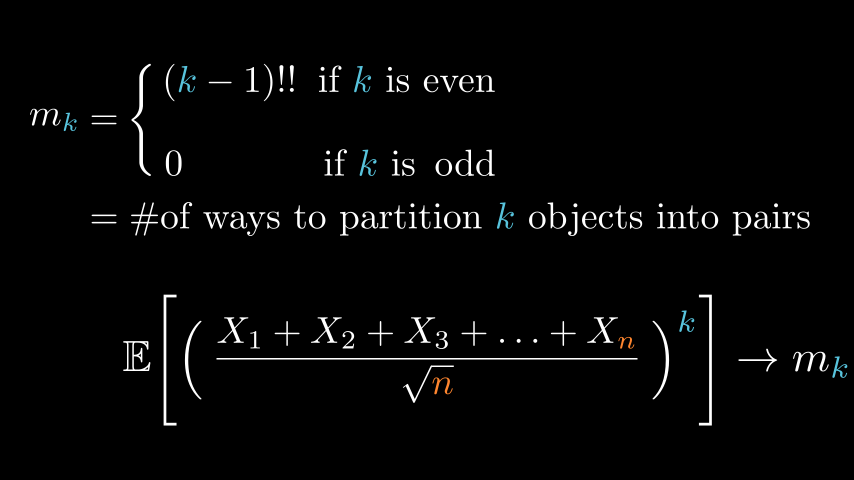

In [498]:
%%manim -ql -v CRITICAL test
from manim import *

class test(Scene):
    def construct(self):
        ####Eqn with cases
        cases = MathTex(r"\begin{cases} \phantom{(1-1)!!} \\ \phantom{(1-1)!!} \end{cases}",font_size=EQN_SIZE_3)
        #cases.next_to(FINAL_EQN_VGROUP[0])
        answer_even = MathTex(r"({{k}}-1)!! \: \text{ if }{{k}}\text{ is even}",font_size=EQN_SIZE_3)
        answer_even.set_color_by_tex("k", K_COLOR)        
        #printEnumerate(answer_even)
        answer_odd_0 = MathTex(r"0",font_size=EQN_SIZE_3)
        answer_odd_if = MathTex(r" \text{ if }{{k}}\text{ is }\,\text{odd}",font_size=EQN_SIZE_3)
        answer_odd_if.set_color_by_tex("k",K_COLOR)
        #printEnumerate(answer_odd_if)
        answer_even.next_to(cases,RIGHT)
        answer_even.align_to(cases,UP)
        answer_odd_0.next_to(cases,RIGHT)
        answer_odd_0.align_to(cases,DOWN)
        answer_odd_if.align_to(answer_even,RIGHT)
        answer_odd_if.align_to(cases,DOWN)
        eq = MathTex(r"=",font_size=EQN_SIZE_3).next_to(cases,LEFT)
        
        Piecewise_defn = VGroup(eq,cases,answer_even,answer_odd_0,answer_odd_if)
        
        m_k = MathTex(r"m_{{k}}",font_size=EQN_SIZE_3)
        m_k.to_edge(LEFT).shift(2*UP)
        m_k.set_color_by_tex("k",K_COLOR)
        
        Piecewise_defn.next_to(m_k,RIGHT)
        
        PP_text = MathTex(r"= \# \text{of ways to partition }k\text{ objects into pairs}",font_size=EQN_SIZE_3,tex_to_color_map={"k":K_COLOR})
        PP_text.align_to(Piecewise_defn,LEFT).align_to(Piecewise_defn,DOWN).shift(DOWN)
        
        
        BracketL = MathTex(r"\mathbb{E} \Biggl[ \Bigl(",font_size=EQN_SIZE) #tex_to_color_map={"n":N_COLOR,"k":K_COLOR})
        BracketR = MathTex(r"\Bigl)",r"^k",r"\Biggr] \to m_{{k}}",font_size=EQN_SIZE,tex_to_color_map={"n":N_COLOR,"k":K_COLOR})
        
        X_sum = MathTex(r"X_1 + X_2 + X_3 +\ldots+X_",r"n",r"\over",r"\sqrt{","n",r"}",font_size=EQN_SIZE_3)
        
        X_sum[1].color=N_COLOR
        X_sum[4].color=N_COLOR
        
        
        #,tex_to_color_map={"n":N_COLOR,"k":K_COLOR})
        
        #sqrt_n = MathTex(r"\sqrt{{n}}",)
        
        X_sum.shift(2*DOWN)
        BracketL.next_to(X_sum,LEFT)
        BracketR.next_to(X_sum,RIGHT)
        printEnumerate(X_sum)
        self.add(X_sum)
        self.add(BracketL,BracketR)
        
        self.add(Piecewise_defn,m_k,PP_text)
        
        #A.generate_target()
        #A.target.to_edge(LEFT)
        #self.play(MoveToTarget(A))

0 LabeledDot
1 LabeledDot
2 LabeledDot
3 LabeledDot


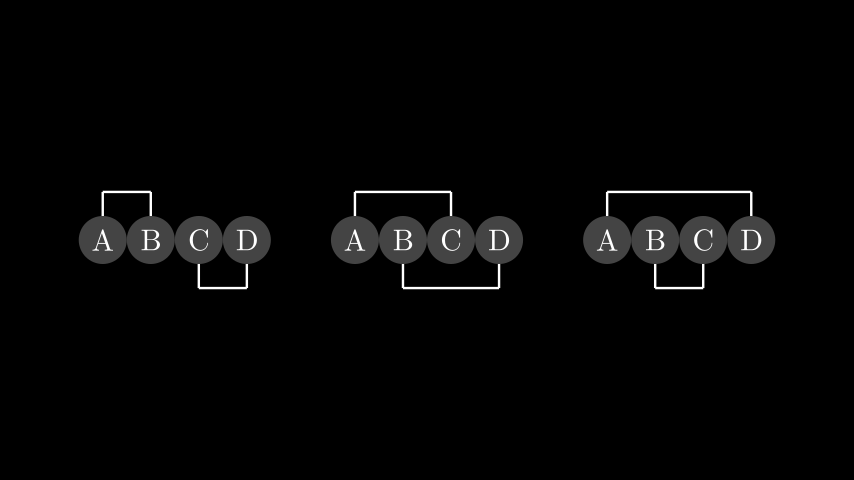

In [312]:
%%manim -ql -v CRITICAL Graph
from manim import *

class Graph(Scene):
    def construct(self):
        
        def PP_lines(start_mob,end_mob,height,my_dir): 
            #returns a VGroup of 3 objects, which are the lines for the pair partiions
            #my_dir is either UP or DOWN
            if my_dir[1]>0:#check if my_dir is pointing up or down
                start = start_mob.get_top()
                end = end_mob.get_top()
            else:
                start = start_mob.get_bottom()
                end = end_mob.get_bottom()

            p1 = start + my_dir*height
            p2 = end + my_dir*height
            return VGroup(Line(p1,p2),Line(start,p1),Line(end,p2))
        
        def PP4():
            #return a list of 3 vgroups for the three pair partitions on 4 elements
            P_COLOR = GRAY_D
            LABELS = ["A","B","C","D"]
            R = 0.4

            P_dot = [None]*4
            for i in range(4):
                P_dot[i] = LabeledDot(Tex(LABELS[i], color=WHITE), radius=R, color=P_COLOR)
            letters = VGroup(*P_dot).arrange(RIGHT,buff=0)

            
            PP = [None]*3
            
            line_1 = PP_lines(P_dot[0],P_dot[1],R,UP)
            line_2 = PP_lines(P_dot[2],P_dot[3],R,DOWN)
            PP[0] = VGroup(letters.copy(),line_1,line_2)
            
            line_1 = PP_lines(P_dot[0],P_dot[2],R,UP)
            line_2 = PP_lines(P_dot[1],P_dot[3],R,DOWN)
            PP[1] = VGroup(letters.copy(),line_1,line_2)
            
            line_1 = PP_lines(P_dot[0],P_dot[3],R,UP)
            line_2 = PP_lines(P_dot[1],P_dot[2],R,DOWN)
            PP[2] = VGroup(letters.copy(),line_1,line_2)
            
            return PP[0],PP[1],PP[2]
        
        def PP6():
            #return a list of 3 vgroups for the three pair partitions on 4 elements
            P_COLOR = GRAY_D
            LABELS = ["A","B","C","D","E","F"]
            R = 0.4

            P_dot = [None]*6
            for i in range(6):
                P_dot[i] = LabeledDot(Tex(LABELS[i], color=WHITE), radius=R, color=P_COLOR)
            letters = VGroup(*P_dot).arrange(RIGHT,buff=0)

            def my_PP(a,b,c,d,e,f,last_h):
                #Pairs a-b, c-d, and e-f with e-f being scaled by last_h
                line_1 = PP_lines(P_dot[a],P_dot[b],R,UP)
                line_2 = PP_lines(P_dot[c],P_dot[d],R,DOWN)
                line_3 = PP_lines(P_dot[e],P_dot[f],R,last_h*UP)
                return VGroup(letters.copy(),line_1,line_2,line_3)

            
            PP = [None]*15
            
            #AB pairings
            PP[0] = my_PP(0,1,2,3,4,5,1.0)
            PP[1] = my_PP(0,1,2,4,3,5,1.0)
            PP[2] = my_PP(0,1,2,5,3,4,1.0)
            
            #AC pairings
            PP[3] = my_PP(0,2,1,3,4,5,1.0)
            PP[4] = my_PP(0,2,1,4,3,5,1.0)
            PP[5] = my_PP(0,2,1,5,3,4,1.0)
            
            #AD pairings
            PP[6] = my_PP(0,3,1,2,4,5,1.0)
            PP[7] = my_PP(0,3,1,4,2,5,0.5)
            PP[8] = my_PP(0,3,1,5,2,4,0.5)
            
            #AE pairings
            PP[9] = my_PP(0,4,1,2,3,5,0.5)
            PP[10] = my_PP(0,4,1,3,2,5,0.5)
            PP[11] = my_PP(0,4,1,5,2,3,0.5)
            
            #AF pairings
            PP[12] = my_PP(0,5,1,2,3,4,0.5)
            PP[13] = my_PP(0,5,1,3,2,4,0.5)
            PP[14] = my_PP(0,5,1,4,2,3,0.5)
            return PP
        
        #PP = PP6()
        #PP_cols = [None]*5
        #for i in range(5):
        #    PP_cols[i] = VGroup(*[PP[3*i+k].scale(0.5) for k in range(3)]).arrange(DOWN,buff=0.4)
        #All = VGroup(*PP_cols).arrange(RIGHT,buff=0.25)
        #self.add(All)
        
        PP = PP4()
        All = VGroup(*PP).arrange(RIGHT,buff=1)
        printEnumerate(PP[0][0])
        self.add(All)
        
        
        return 0
        
        
        GaussPDF = MathTexAndColor(r"p_{{Z}}({{x}})=",r" e^{-\frac{1}{2", r"\sigma^2}\bigl(",r" {{x}}","-\mu",r"\bigr)",r"^2}",r"/ {\sqrt{2\pi", r"\sigma^2}}")
        StandardGaussPDF = MathTexAndColor(r"p_{{Z}}({{x}})=",r" e^{-\frac{1}{2", r"} {{x}}^2}",r"/ {\sqrt{2\pi", r"}}")
        printEnumerate(StandardGaussPDF)
        printEnumerate(GaussPDF)
        self.add(GaussPDF)
        self.play(TransformMatchingTex(GaussPDF,StandardGaussPDF))
        return 0
        
        Z_COLOR = WHITE
        
        #BELL_CURVE.set_height(BELL_CURVE.height*0.5)
        
        Line1 = MathTex(r"\text{Central Limit Theorem:}",font_size=EQN_SIZE)
        Line2 = MathTex(r"\text{As }"r"{{n}}",r"\to \infty,", r"\text{ the sum of }", r"{{n}}", r"\text{ random variables behave like}")
        Line2[1].color = N_COLOR
        Line2[4].color =  N_COLOR

        Line3 = MathTex(r"X_1 + X_2 + X_3 +\ldots+X_{{n}}}",r"\approx {{Z}},",font_size=EQN_SIZE)
        Line3[1].color =  N_COLOR
        printEnumerate(Line3)
        Line4 = MathTex(r"\text{ where }Z\text{ is a }",r"\text{Gaussian}",r"\text{ random variable.}")
        Line4[1].color = Z_COLOR
        
        printEnumerate(Line4)
        CLT = VGroup(Line1,Line2,Line3,Line4).arrange(DOWN)
        Line1.align_to(Line2,LEFT)
        Line4.align_to(Line2,LEFT)
        
        ul = Underline(Line1)
        ul2 = Underline(Line4[1])
        ul2.color = Z_COLOR
        box = SurroundingRectangle(CLT,buff=0.4)
        
        self.add(CLT,ul,ul2,box)
        

        
        self.wait()


In [395]:
%%manim -ql -v CRITICAL RateFunctions1Example

class RateFunctions1Example(Scene):
    def construct(self):
        line1 = Line(3*LEFT, 3*RIGHT).shift(UP).set_color(RED)
        line2 = Line(3*LEFT, 3*RIGHT).set_color(GREEN)
        line3 = Line(3*LEFT, 3*RIGHT).shift(DOWN).set_color(BLUE)

        dot1 = Dot().move_to(line1.get_left())
        dot2 = Dot().move_to(line2.get_left())
        dot3 = Dot().move_to(line3.get_left())

        label1 = Tex("Ease In").next_to(line1, RIGHT)
        label2 = Tex("Ease out").next_to(line2, RIGHT)
        label3 = Tex("Ease In Out").next_to(line3, RIGHT)

        self.play(
            FadeIn(VGroup(line1, line2, line3)),
            FadeIn(VGroup(dot1, dot2, dot3)),
            Write(VGroup(label1, label2, label3)),
        )
        dot2.generate_target()
        dot2.target.shift(6*RIGHT)
        
        self.play(
            MoveAlongPath(dot1, line1, rate_func=rate_functions.ease_in_sine),
            MoveToTarget(dot2, rate_func=rate_functions.ease_out_sine),
            MoveAlongPath(dot3, line3, rate_func=rate_functions.ease_in_out_sine),
            run_time=7
        )
        self.wait()